Python script for calculating the protein enrichment or depletion abundance values for the top 10 (adjustable) proteins present in the  proteomic dataset.

---

Plots the log2 abundance vs protein name plot

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Select processed proteomics file for analysis; files should be run first through Proteomic_Data_Perseus_to_df.ipynb

In [3]:
abundance_files = [
    '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_Data/Proteomics/Abundance_Files/Bov Swiss Intensity .csv',
    '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_Data/Proteomics/Abundance_Files/Bov Swiss Top3 .csv',
    '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_Data/Proteomics/Abundance_Files/Bov Swiss iBAQ .csv'
]

     Entry  Total_NP_Abundance
0   P02769          558.508730
1   P12763          209.268794
2   P01966          130.744475
3   P34955           78.627987
5   P15497           65.472812
4   Q2UVX4           64.341150
6   P00735           52.385972
7   Q03247           50.670440
9   Q7SIH1           46.380551
10  P02081           45.775599
                             prot2  Total_NP_Abundance
0                         Albumin           558.508730
1         Alpha-2-HS-glycoprotein           209.268794
2        Hemoglobin subunit alpha           130.744475
3          Alpha-1-antiproteinase            78.627987
5              Apolipoprotein A-I            65.472812
4                   Complement C3            64.341150
6                     Prothrombin            52.385972
7                Apolipoprotein E            50.670440
9           Alpha-2-macroglobulin            46.380551
10  Hemoglobin fetal subunit beta            45.775599


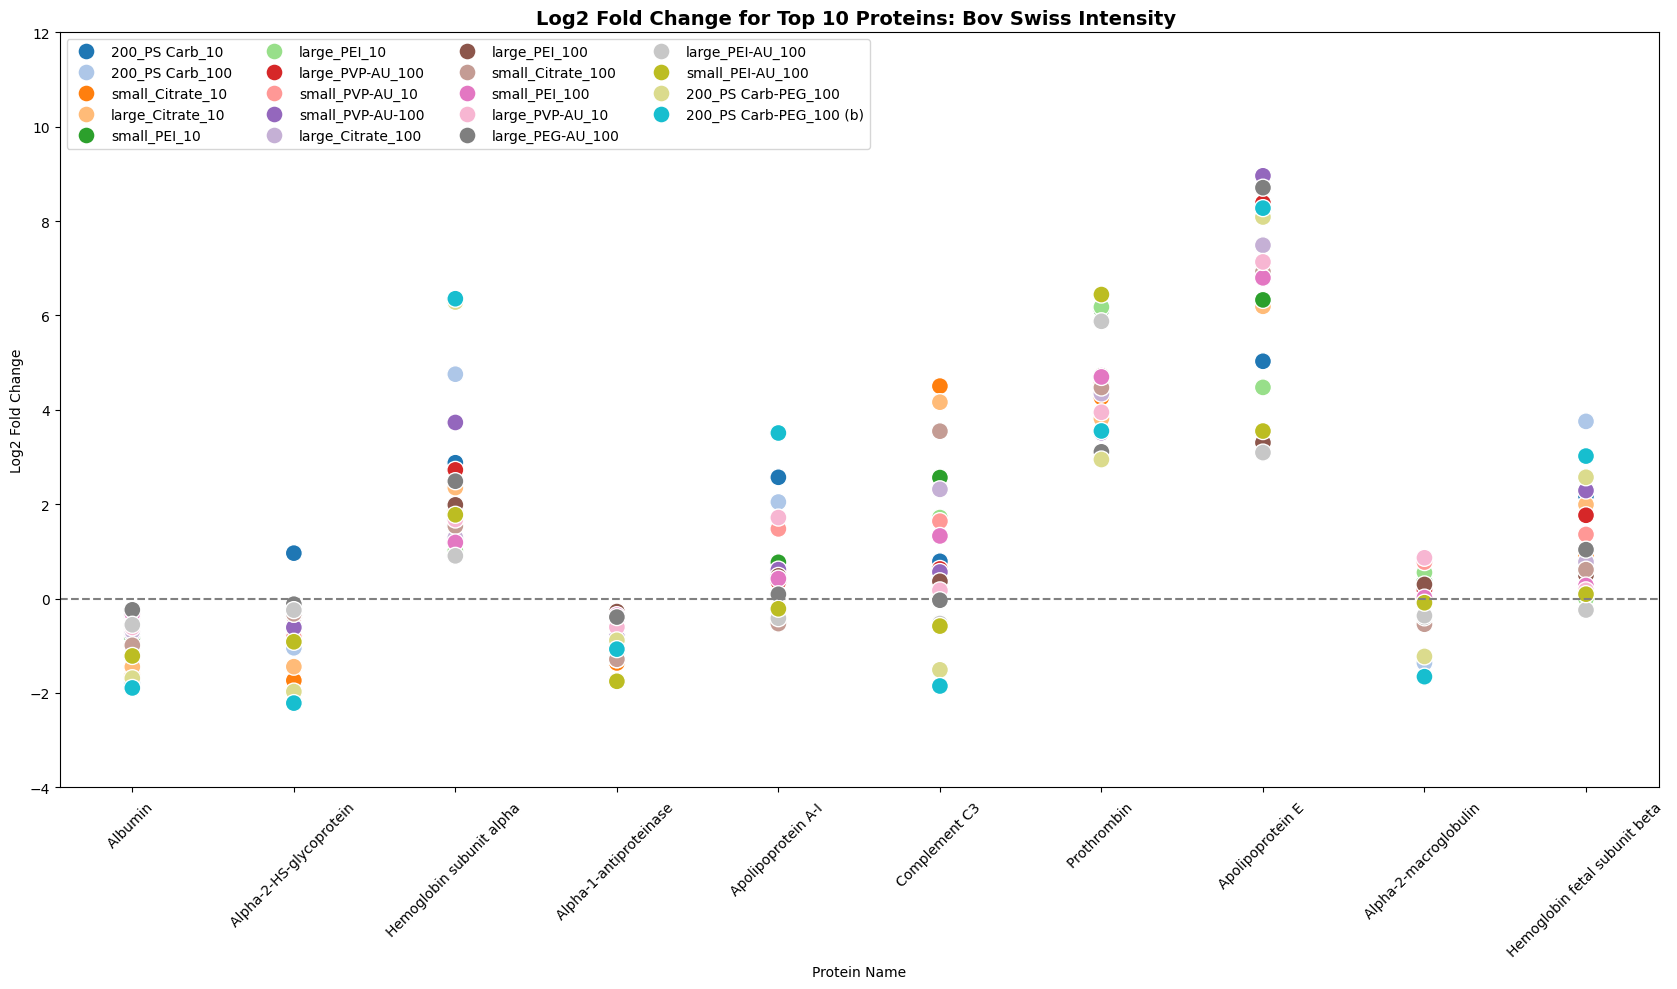

     Entry  Total_NP_Abundance
0   P02769          369.418440
1   P12763          269.501025
2   P01966          173.923716
3   P34955          108.105385
4   P02081           75.130781
5   P15497           63.799653
7   P00978           49.102188
6   Q03247           47.969619
8   P17690           38.410423
10  P00735           36.670672
                             prot2  Total_NP_Abundance
0                         Albumin           369.418440
1         Alpha-2-HS-glycoprotein           269.501025
2        Hemoglobin subunit alpha           173.923716
3          Alpha-1-antiproteinase           108.105385
4   Hemoglobin fetal subunit beta            75.130781
5              Apolipoprotein A-I            63.799653
7                    Protein AMBP            49.102188
6                Apolipoprotein E            47.969619
8           Beta-2-glycoprotein 1            38.410423
10                    Prothrombin            36.670672


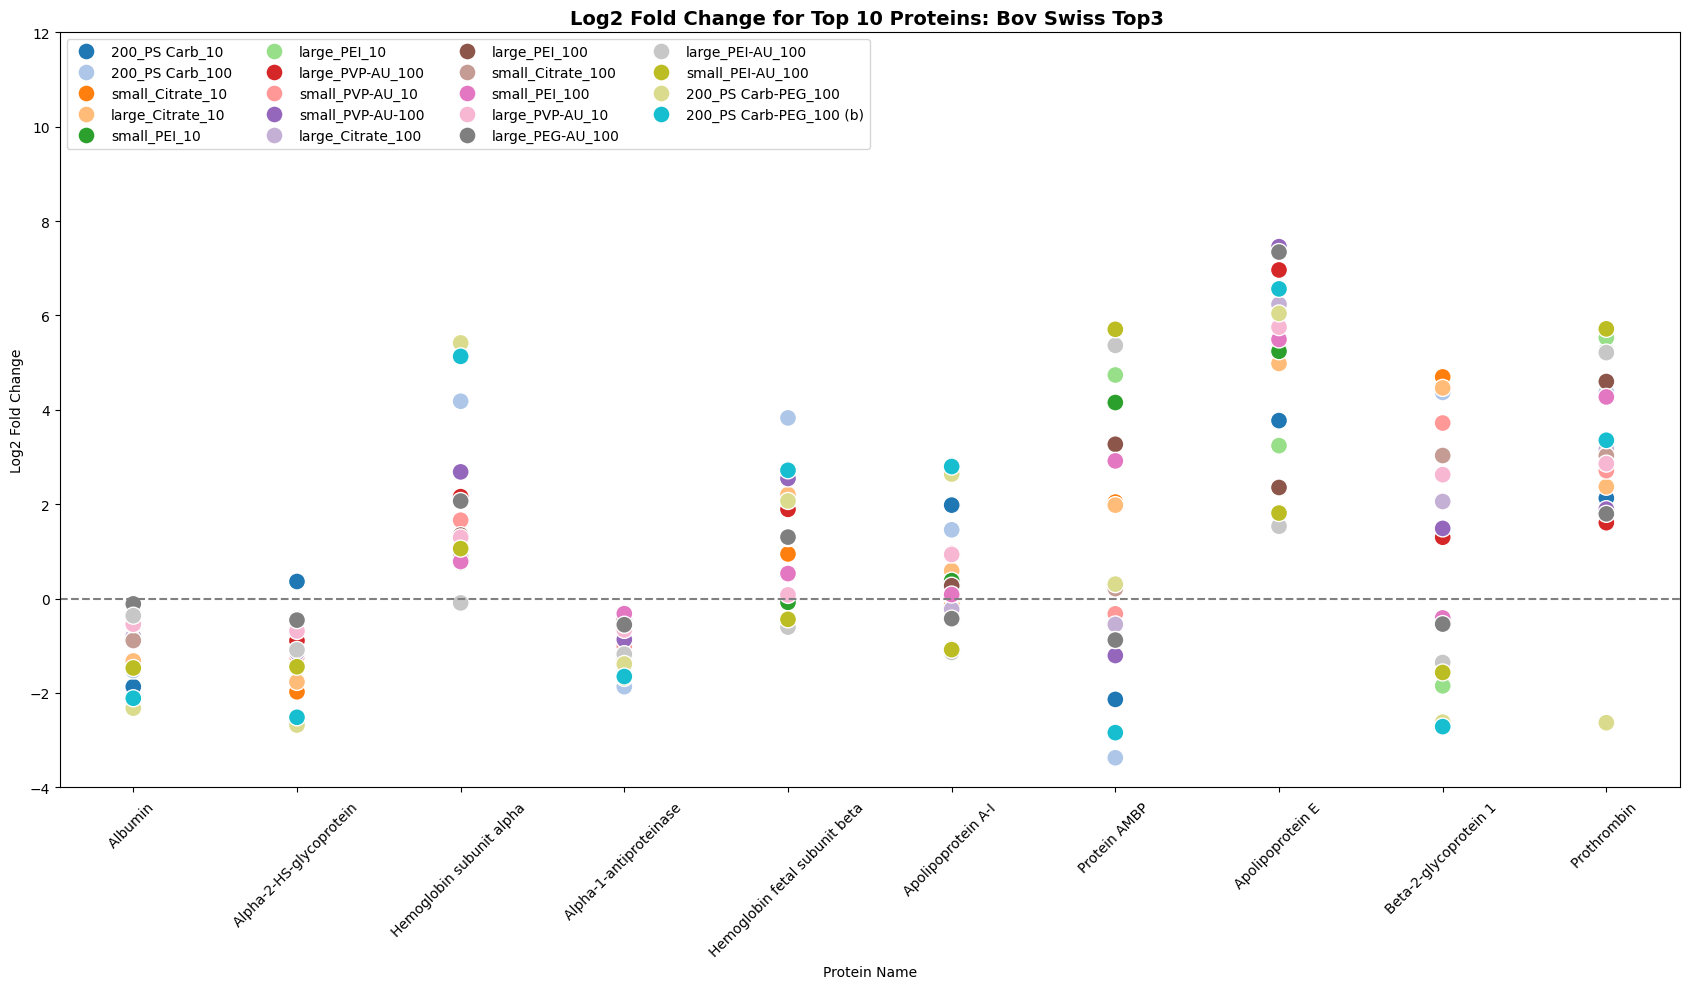

    Entry  Total_NP_Abundance
0  P12763          380.474267
1  P02769          263.005582
2  P01966          173.244429
4  P15497          103.874019
5  Q03247           99.735719
3  P34955           98.537486
6  P02081           76.436886
7  Q2KIS7           71.223030
8  P56651           46.369821
9  P00978           46.188740
                                           prot2  Total_NP_Abundance
0                       Alpha-2-HS-glycoprotein           380.474267
1                                       Albumin           263.005582
2                      Hemoglobin subunit alpha           173.244429
4                            Apolipoprotein A-I           103.874019
5                              Apolipoprotein E            99.735719
3                        Alpha-1-antiproteinase            98.537486
6                 Hemoglobin fetal subunit beta            76.436886
7                                   Tetranectin            71.223030
8  Inter-alpha-trypsin inhibitor heavy chain H2  

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


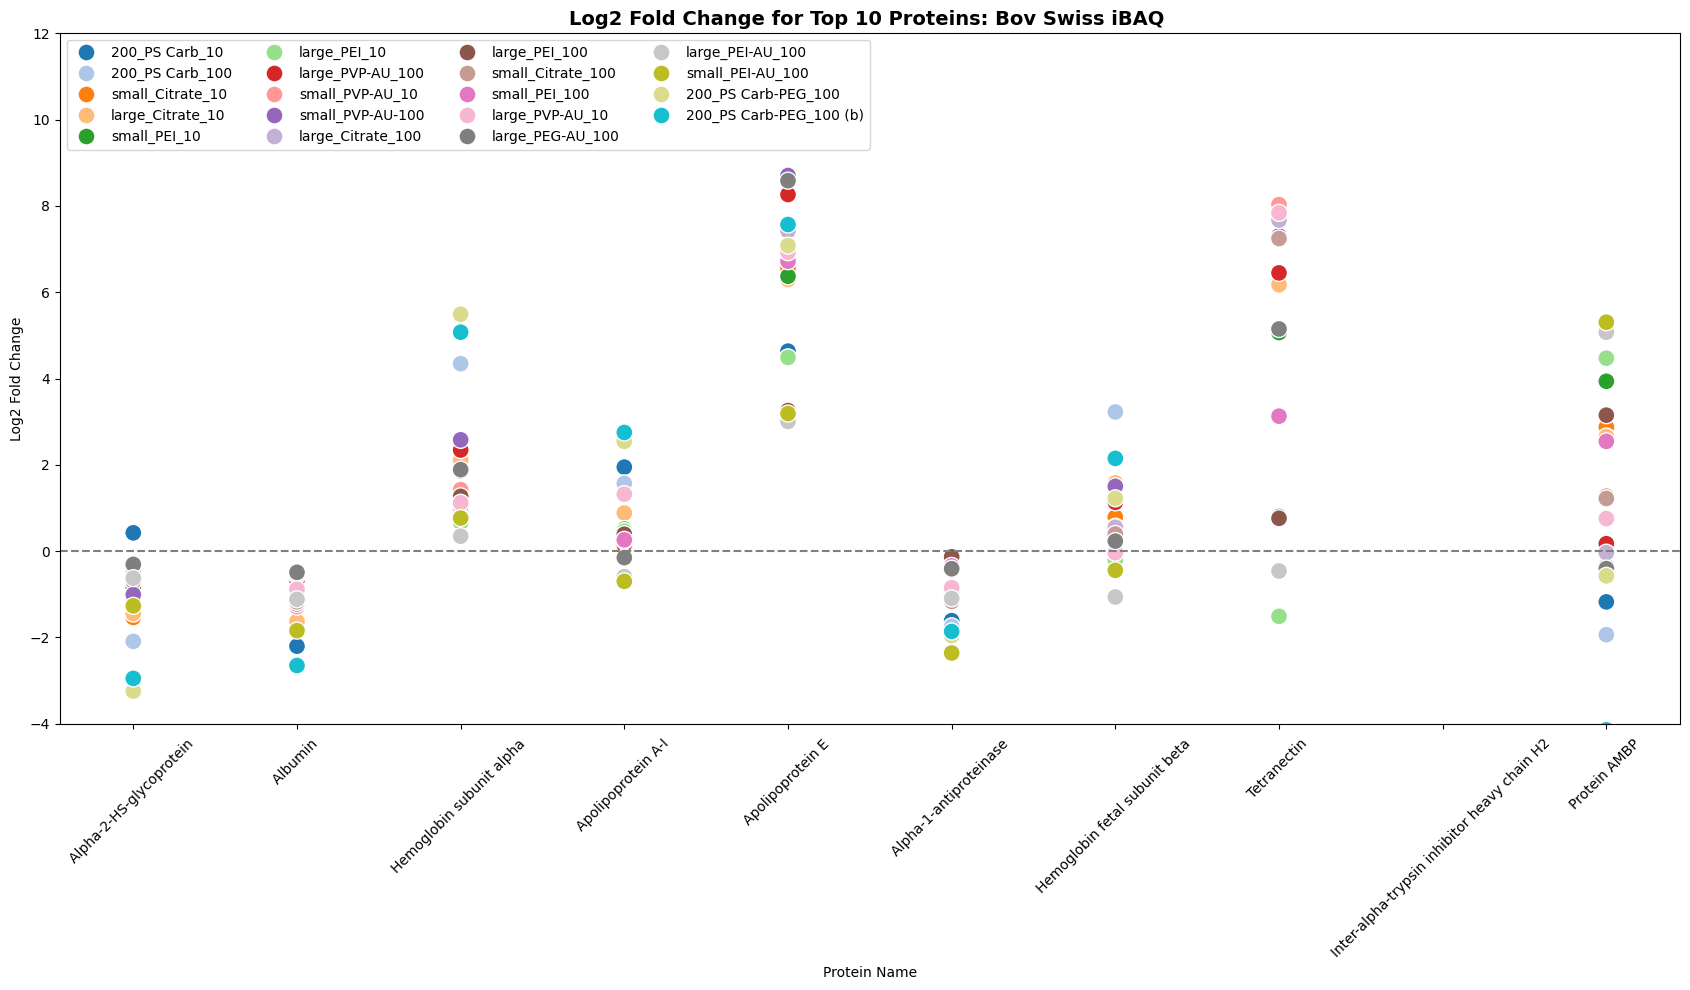

In [9]:
def process_protein_data(file_path):
    # Extract dataset name from file path
    dataset_name = file_path.split('/')[-1].split('.csv')[0]

    # Load data
    df = pd.read_csv(file_path, header=0)
    grouped_dfs = []

    np_data = df.columns[4:23]
    fbs_control = df.columns[23]
    protein_col = 'Entry'

    # Calculate total abundance for protein corona samples
    df['Total_NP_Abundance'] = df[np_data].sum(axis=1)

    # Get the top 10 rows with the highest 'Total_NP_Abundance'
    top_10 = df.nlargest(10, 'Total_NP_Abundance')

    # Print the corresponding 'Entry' column and 'Total_NP_Abundance' values
    print(top_10[[protein_col, 'Total_NP_Abundance']])



    # Calculate the log2 fold change for each column in np_data and fbs_control
    log2_fold_change = np.log2(top_10[np_data].div(top_10[fbs_control], axis=0))

    # Add the 'Entry' column for reference
    log2_fold_change[protein_col] = top_10[protein_col].values

    # Reorder columns to have 'Entry' first
    columns = [protein_col] + list(np_data)
    log2_fold_change = log2_fold_change[columns]

    print(top_10[['prot2', 'Total_NP_Abundance']])

    # Add the 'Entry' column for reference
    log2_fold_change['prot2'] = top_10['prot2'].values

    # Melt the DataFrame for easier plotting
    melted_data = log2_fold_change.melt(id_vars=['prot2'], value_vars=np_data,
                                        var_name='Sample', value_name='Log2_Fold_Change')

        # Melt the DataFrame for easier plotting
    melted_data = log2_fold_change.melt(id_vars=['prot2'], value_vars=np_data,
                                            var_name='Sample', value_name='Log2_Fold_Change')

    new_legend_items = {
      '31': '200_PS Carb_10',
      '32': '200_PS Carb_100',
      '33': 'small_Citrate_10',
      '34': 'large_Citrate_10',
      '35': 'small_PEI_10',
      '36': 'large_PEI_10',
      '37': 'large_PVP-AU_100',
      '38': 'small_PVP-AU_10',
      '39': 'small_PVP-AU-100',
      '40': 'large_Citrate_100',
      '41': 'large_PEI_100',
      '42': 'small_Citrate_100',
      '43': 'small_PEI_100',
      '44': 'large_PVP-AU_10',
      '45': 'large_PEG-AU_100',
      '46': 'large_PEI-AU_100',
      '47': 'small_PEI-AU_100',
      '48': '200_PS Carb-PEG_100',
      '49': '200_PS Carb-PEG_100 (b)',
    }

    # Map the 'Sample' column in melted_data to the new sample names
    melted_data['Sample'] = melted_data['Sample'].map(new_legend_items)

    # Plotting
    plt.figure(figsize=(17, 10))
    sns.scatterplot(data=melted_data, x='prot2', y='Log2_Fold_Change', hue='Sample', palette='tab20', s=150)
    plt.axhline(0, color='gray', linestyle='--')
    plt.ylim(-4, 12)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', ncol=4)
    plt.xlabel('Protein Name')
    plt.ylabel('Log2 Fold Change')
    plt.title(f'Log2 Fold Change for Top 10 Proteins: {dataset_name}', fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.show()


for file in abundance_files:
    process_protein_data(file)

In [ ]:
new_legend_items = {
    '31': '200_PS Carb_10',
    '32': '200_PS Carb_100',
    '33': 'small_Citrate_10',
    '34': 'large_Citrate_10',
    '35': 'small_PEI_10',
    '36': 'large_PEI_10',
    '37': 'large_PVP-AU_100',
    '38': 'small_PVP-AU_10',
    '39': 'small_PVP-AU-100',
    '40': 'large_Citrate_100',
    '41': 'large_PEI_100',
    '42': 'small_Citrate_100',
    '43': 'small_PEI_100',
    '44': 'large_PVP-AU_10',
    '45': 'large_PEG-AU_100',
    '46': 'large_PEI-AU_100',
    '47': 'small_PEI-AU_100',
    '48': '200_PS Carb-PEG_100',
    '49': '200_PS Carb-PEG_100 (b)',
}


def process_protein_data_combined(file_path):
    dataset_name = file_path.split('/')[-1].split('.csv')[0]
    df = pd.read_csv(file_path, header=0)

    np_data = df.columns[4:23]  # Sample columns
    fbs_control = df.columns[23]  # Control column
    protein_col = 'Entry'

    df['Total_NP_Abundance'] = df[np_data].sum(axis=1)
    top_10 = df.nlargest(10, 'Total_NP_Abundance')

    log2_fold_change = np.log2(top_10[np_data].div(top_10[fbs_control], axis=0))
    log2_fold_change[protein_col] = top_10[protein_col].values
    log2_fold_change['prot2'] = top_10['prot2'].values

    melted_data = log2_fold_change.melt(id_vars=['prot2'], value_vars=np_data,
                                        var_name='Sample', value_name='Log2_Fold_Change')

    # Apply legend mapping if needed
    melted_data['Sample'] = melted_data['Sample'].map(new_legend_items)
    melted_data['Dataset'] = dataset_name  # Add dataset name for later grouping

    return melted_data

In [ ]:
all_data = pd.DataFrame()

abundance_files = [
    '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_Data/Proteomics/Abundance_Files/Bov Swiss Intensity .csv',
    '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_Data/Proteomics/Abundance_Files/Bov Swiss Top3 .csv',
    '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_Data/Proteomics/Abundance_Files/Bov Swiss iBAQ .csv'
]

for file in abundance_files:
    dataset_data = process_protein_data_combined(file)
    all_data = pd.concat([all_data, dataset_data], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


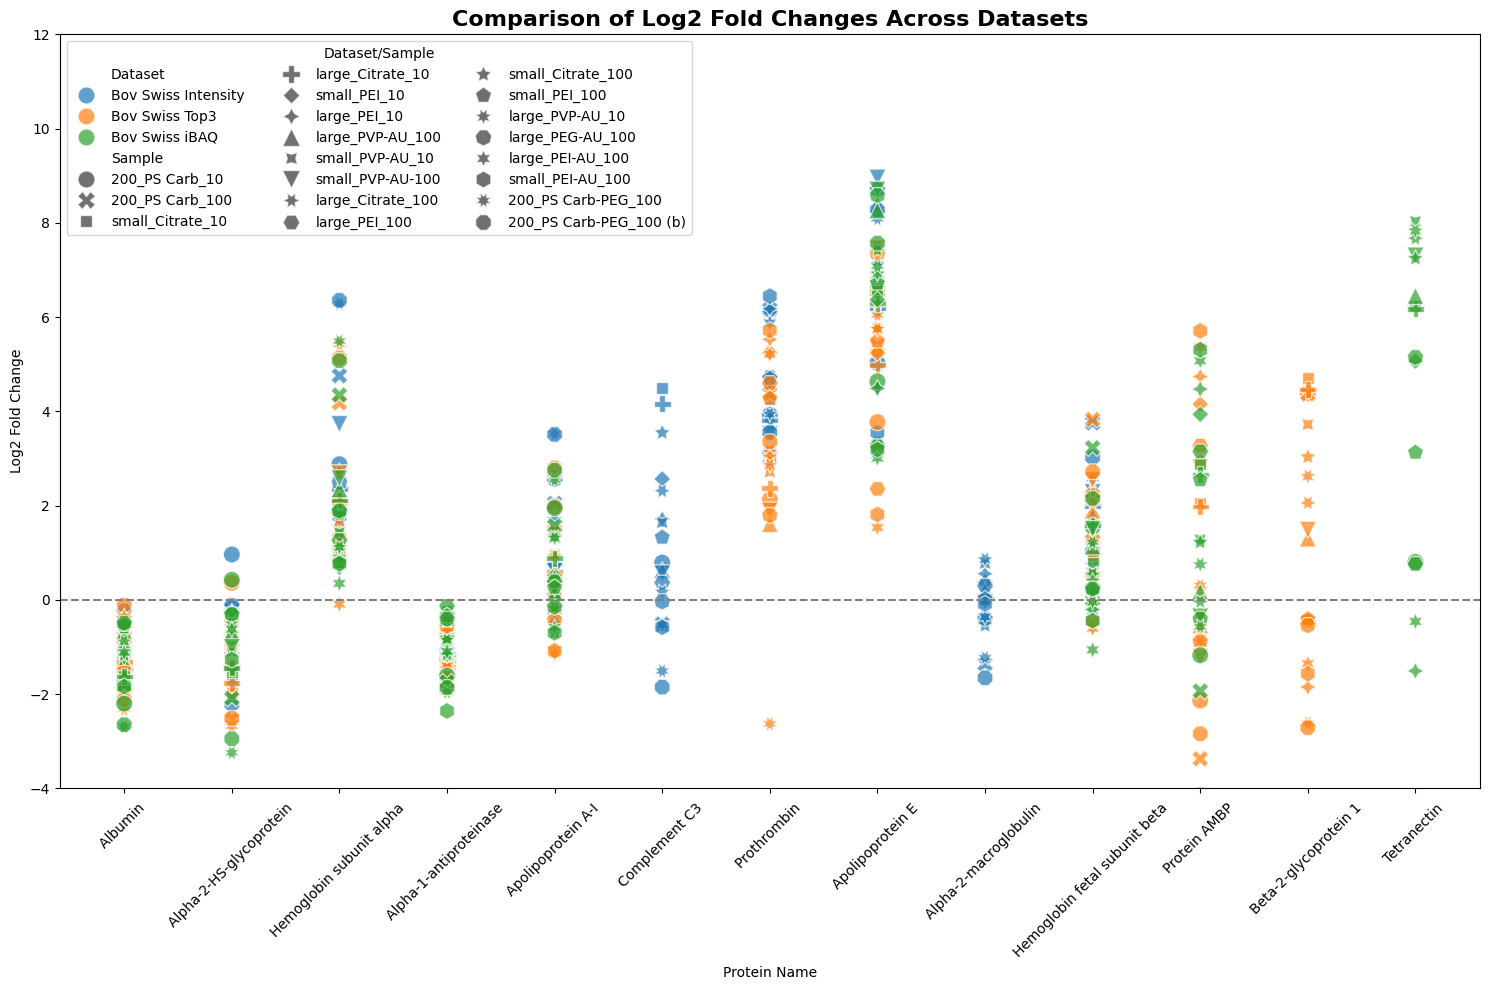

In [ ]:
# plt.figure(figsize=(15, 10))
# sns.scatterplot(data=all_data, x='prot2', y='Log2_Fold_Change', hue='Dataset', style='Sample', palette='tab10', s=150)
# plt.axhline(0, color='gray', linestyle='--')
# plt.ylim(-4, 12)
# plt.xticks(rotation=45)
# plt.legend(loc='upper left', ncol=3, title='Dataset/Sample')
# plt.xlabel('Protein Name')
# plt.ylabel('Log2 Fold Change')
# plt.title('Comparison of Log2 Fold Changes Across Datasets', fontweight='bold', fontsize=16)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(15, 10))
sns.scatterplot(data=all_data, x='prot2', y='Log2_Fold_Change', hue='Dataset', style='Sample', palette='tab10', s=150, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-4, 12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', ncol=3, title='Dataset/Sample')
plt.xlabel('Protein Name')
plt.ylabel('Log2 Fold Change')
plt.title('Comparison of Log2 Fold Changes Across Datasets', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Check for exact matches in Log2 Fold Changes across datasets for each protein
grouped = all_data.groupby('prot2')
for name, group in grouped:
    if group['Log2_Fold_Change'].nunique() == 1:
        print(f"{name} has identical Log2 Fold Changes across datasets.")
    else:
        print(f"{name} has varying Log2 Fold Changes across datasets.")


Albumin  has varying Log2 Fold Changes across datasets.
Alpha-1-antiproteinase  has varying Log2 Fold Changes across datasets.
Alpha-2-HS-glycoprotein  has varying Log2 Fold Changes across datasets.
Alpha-2-macroglobulin  has varying Log2 Fold Changes across datasets.
Apolipoprotein A-I  has varying Log2 Fold Changes across datasets.
Apolipoprotein E  has varying Log2 Fold Changes across datasets.
Beta-2-glycoprotein 1  has varying Log2 Fold Changes across datasets.
Complement C3  has varying Log2 Fold Changes across datasets.
Hemoglobin fetal subunit beta  has varying Log2 Fold Changes across datasets.
Hemoglobin subunit alpha  has varying Log2 Fold Changes across datasets.
Inter-alpha-trypsin inhibitor heavy chain H2  has identical Log2 Fold Changes across datasets.
Protein AMBP  has varying Log2 Fold Changes across datasets.
Prothrombin  has varying Log2 Fold Changes across datasets.
Tetranectin  has varying Log2 Fold Changes across datasets.
